In [4]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
col_names = ['line', 'direction', 'station_diva_id', 'date', 'should_arrive_at', 
              'actually_arrived_at', 'next_station_diva_nach']

In [6]:
targetStationId = 2572

In [7]:
stationDS = pd.read_csv('data/generated/station_' + str(targetStationId) + '.csv')

Data types of the columns

In [8]:
stationDS.dtypes
# stationDS.date.unique()

actually_arrived_at         int64
date                       object
delays                    float64
direction                   int64
line                        int64
next_station_diva_nach      int64
should_arrive_at            int64
station_diva_id             int64
dtype: object

In [9]:
ds = stationDS.copy()
# ds = ds.loc[(ds['line'] == 8) | (ds['line'] == 10) | (ds['line'] == 75)]

[8, 10, 11, 12, 14, 15, 17, 61, 62, 75, 94]


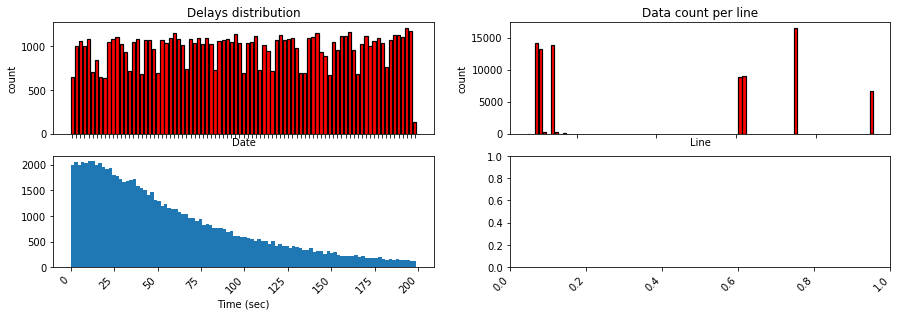

In [10]:
#Plotting graphs

# fig, ax = plt.subplots()
# ax.set_title('Data count per day')
# ax.set_ylabel('count')
# ax.plot(count_per_day.index, count_per_day.line)
# ax.margins(x=0, y=0)

# plt.hist(ds.date)
# plt.ylabel('Data count per day');


# Set up the plotting layout
fig, ((ax1, ax2), (ax21, ax22)) = plt.subplots(nrows=2, ncols=2, figsize = (15,5))
fig.autofmt_xdate(rotation = 45)

ax1.set_xlabel('Date'); ax1.set_ylabel('count'); ax1.set_title('Data count per day')
# ax1.hist(ds.date)
count_per_day = ds.groupby('date').count()
ax1.bar(count_per_day.index, count_per_day.line, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);


ax2.set_xlabel('Line'); ax2.set_ylabel('count'); ax2.set_title('Data count per line')
# ax2.hist(ds.line);
count_per_line = ds.groupby('line').count()
ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);
lines = ds.line.unique()
print(sorted(lines))
# plt.xticks(count_per_line.index, count_per_line['index'].apply(str), rotation='vertical')

# fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize = (15,5))
# fig.autofmt_xdate(rotation = 45)

ax21.set_xlabel('Time (sec)'); ax1.set_ylabel('count'); ax1.set_title('Delays distribution')
ax21.hist(ds.delays, bins=100);
# ax1.scatter(delays, delays);
# count_per_line = ds.groupby('line').count()
# ax2.bar(count_per_line.index, count_per_line.date, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);

In [11]:

# Set up the plotting layout
plt.figure()

ax1.set_xlabel('Date'); ax1.set_ylabel('count'); ax1.set_title('Data count per day')
# ax1.hist(ds.date)
count_per_day = ds.groupby('date').count()
ax1.bar(count_per_day.index, count_per_day.line, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2);


<Figure size 432x288 with 0 Axes>

In [8]:
# Add column to represent day of week
# ds['date'] = pd.to_datetime(ds['date'])
ds['day_of_week'] = pd.to_datetime(ds['date']).dt.weekday

# split date into day, month, year
ds['day'] = pd.to_datetime(ds['date']).dt.day
ds['month'] = pd.to_datetime(ds['date']).dt.month
# ds['year'] = pd.to_datetime(ds['date']).dt.year

# drop date column because we splitted it
ds = ds.drop('date', axis = 1)

# drop 'actually_arrived_at' column because we have delays now!
ds = ds.drop('actually_arrived_at', axis = 1)

print(ds.shape)
ds.head()
# ds.day_of_week.unique()

(82874, 9)


,delays,direction,line,next_station_diva_nach,should_arrive_at,station_diva_id,day_of_week,day,month
0,32.0,1,12,3447,16800,2572,6,14,4
1,136.0,2,14,3447,18054,2572,6,14,4
2,11.0,1,10,2151,18282,2572,6,14,4
3,8.0,1,62,3154,18324,2572,6,14,4
4,31.0,1,75,694,18384,2572,6,14,4


In [9]:
# Convert to numpy array
labels = np.array(ds.delays)

tempDS = ds.drop('delays', axis = 1)

# tempDS = tempDS.drop('next_station_diva_nach', axis = 1)
# tempDS = tempDS.drop('month', axis = 1)
# tempDS = tempDS.drop('direction', axis = 1)

features = np.array(tempDS)

# Saving feature names for later use
feature_list = list(tempDS.columns)

As there are some 0 in labels so when calculating accuracy, dividing by zero results in infinity, so adding 1 to all labels (i.e. delays). Now, 1 means no delay!

In [10]:
# labels = labels + 1

In [11]:
print(features[:5])
print(labels[:5])

[[    1    12  3447 16800  2572     6    14     4]
 [    2    14  3447 18054  2572     6    14     4]
 [    1    10  2151 18282  2572     6    14     4]
 [    1    62  3154 18324  2572     6    14     4]
 [    1    75   694 18384  2572     6    14     4]]
[ 32. 136.  11.   8.  31.]


In [12]:
# delete variables
del ds
del stationDS

In [13]:
from sklearn.model_selection import train_test_split

# train_features, test_features, train_labels, test_labels = train_test_split(
#     features, labels, test_size = 0.20, random_state = 42
# );

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size = 0.20, shuffle=False
);

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (66299, 8)
Training Labels Shape: (66299,)
Testing Features Shape: (16575, 8)
Testing Labels Shape: (16575,)


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [15]:
print('mean of delay: ', labels.mean())

mean of delay:  57.01790670173999


In [16]:
# Use the forest's predict method on the training data
train_predictions = rf.predict(train_features)

In [17]:
# training set errors
# Calculate the absolute errors
train_errors = abs(train_predictions - train_labels)

print('[Train] Average error:', round(np.mean(train_errors), 2))

print('[Train] SSE: ', round(np.sqrt(np.mean(np.square(train_errors))), 2))

[Train] Average error: 12.84
[Train] SSE:  16.42


In [18]:
print(train_labels[:20])
print(train_predictions[:20])

[ 32. 136.  11.   8.  31.  26.  14.  10.   7.  41.  44.   3.  62.  68.
  48.  36.   2. 106.  70. 109.]
[ 27.242 101.954  19.314  19.236  31.05   25.588  27.559  36.616  17.588
  38.05   36.228  13.606  50.622  55.059  36.2    32.255  17.39   81.955
  54.941  81.357]


In [19]:
# Use the forest's predict method on the test data
test_predictions = rf.predict(test_features)

print(test_labels[:20])
print(test_predictions[:20])

[ 93.  71. 171.  76.  98.   5.   3.  39.  45.  29. 138. 164.  41.  30.
 109. 163.  45.  40.  68.  11.]
[ 51.595  42.683  81.977 110.322  23.755  67.045  50.58   56.329  55.647
  21.002  62.731  96.151 101.706  26.175  64.08   82.506  58.765  69.297
  37.009  60.595]
[Test] Average error: 36.42
[Test] SSE:  46.46


In [35]:
# Test set errors
# Calculate the absolute errors
test_errors = abs(test_predictions - test_labels)

print('[Test] Average error:', round(np.mean(test_errors), 2))
 
print('[Test] SSE: ', round(np.sqrt(np.mean(np.square(test_errors))), 2))
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

conf_interval = 0.05 # confidence_interval 5%

margin = np.array(test_predictions / test_labels)
chk = margin < (1 + conf_interval) 

percetnage_under_confidence = sum(chk) / margin.size
print('percetnage_under_confidence: ', percetnage_under_confidence)

# err = np.array(test_errors)
# percetnage_under_confidence = (sum(err < confidence_interval)) / err.size
# print('percetnage_under_confidence: ', percetnage_under_confidence)


# Calculate mean absolute percentage error (MAPE)
# mape = (errors / test_labels)

# # Calculate and display accuracy
# accuracy = 100 - np.mean(mape)

# print('Accuracy:', round(accuracy, 2), '%.')

[Test] Average error: 36.42
[Test] SSE:  46.46
percetnage_under_confidence:  0.4681146304675716


/home/faizi/programs/anaconda3/envs/dps/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


In [20]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot

# # Pull out one tree from the forest
# tree = rf.estimators_[5]

# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')

# # Write graph to a png file
# graph.write_png('data/generated/tree.png')

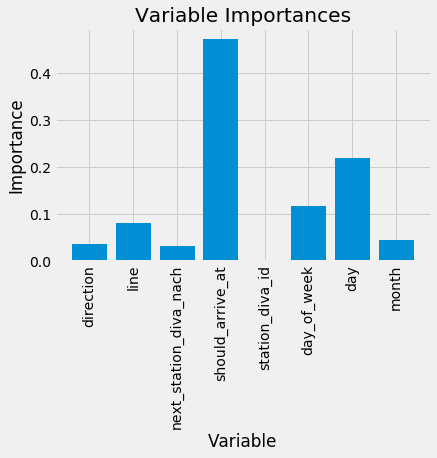

In [21]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');